<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-multiple-regression/polynomial-log-linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)

In [2]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
df_2 = df.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df['2ndFlrSF'].isna().sum()

0

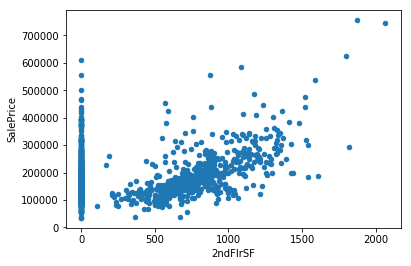

In [4]:
df.plot(x='2ndFlrSF', y='SalePrice', kind='scatter')

RMSE: 0.34229298020714355
r2_score - R^2: 0.37215435730948365
model.score - R^2: 0.3425970883723247


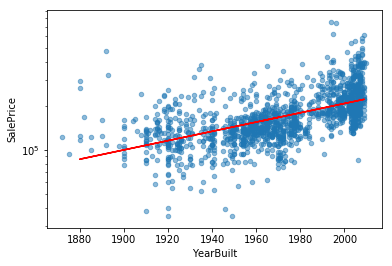

In [5]:
#Log transform y

#Feature
X= df[['YearBuilt']]

#Apply nat log to y, target
y= np.log(df['SalePrice'])

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

#Fit model to train data
model = LinearRegression()
model.fit(X_train,y_train)

#Used for R2 
y_pred = model.predict(X_test)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#R^2 - On test 20% of data
print('r2_score - R^2:', r2_score(y_test,y_pred))
#Does the same, but test all the data
print('model.score - R^2:', model.score(X,y))


#Used to graph the line plot
y_pred_exp = np.exp(model.predict(X_test))

ax = df_2.plot(x='YearBuilt', y='SalePrice', kind='scatter', alpha=0.5, logy=True)
ax.plot(X_test, y_pred_exp, color='r')

RMSE: 0.3708276913139229 

Test 20% of the data
r2_score - R^2: 0.16010496749286096
model.score - R^2: 0.16010496749286096 

Test All data
r2_score - R^2: 0.1260966076783161
model.score - R^2: 0.1260966076783161


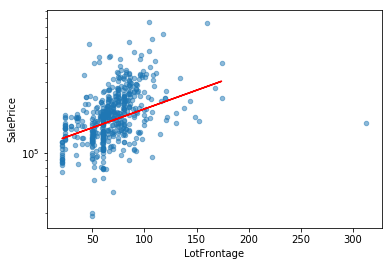

In [12]:
#Log transform y
df_lot = df.copy()
df_lot = df_lot.dropna(subset=['LotFrontage'])

#Feature and Target
feature = ['LotFrontage']
target = 'SalePrice'

#Define X and y
X = df_lot[feature]
y = np.log(df_lot['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

#Used for R2
y_pred_all = model.predict(X)
y_pred = model.predict(X_test)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)),'\n')

#R^2 - On test 20% of data
print('Test 20% of the data')
print('r2_score - R^2:', r2_score(y_test,y_pred))
#Does the same
print('model.score - R^2:', model.score(X_test,y_test),'\n')

#Test all data
print('Test All data')
print('r2_score - R^2:', r2_score(y,y_pred_all))
print('model.score - R^2:', model.score(X,y))

#Used to graph the line plot
y_pred_exp = np.exp(model.predict(X_test))

ax = df_2.plot(x='LotFrontage', y='SalePrice', kind='scatter', alpha=0.5, logy=True)
ax.plot(X_test, y_pred_exp, color='r')

RMSE: 0.2564892109076245
r2_score - R^2: 0.40788359751672687
model.score - R^2: 0.46464705164499465


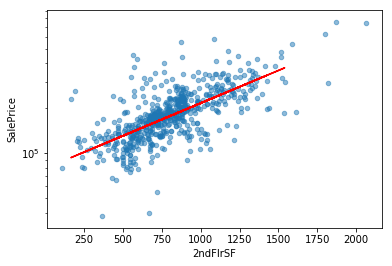

In [7]:
#Log Transform y
df_2 = df_2[df_2['2ndFlrSF']!=0]

#Feature and Target
feature = ['2ndFlrSF']
target = 'SalePrice'

#Define X and y
X = df_2[feature]
y = np.log(df_2['SalePrice'])

#Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=42)

#Fit Model
model = LinearRegression()
model.fit(X_train,y_train)

#Used for R2 
y_pred = model.predict(X_test)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

#R^2 - On test 20% of data
print('r2_score - R^2:', r2_score(y_test,y_pred))
#Does the same, but test all the data
print('model.score - R^2:', model.score(X,y))


#Used to graph the line plot
y_pred_exp = np.exp(model.predict(X_test))

ax = df_2.plot(x='2ndFlrSF', y='SalePrice', kind='scatter', alpha=0.5, logy=True)
ax.plot(X_test, y_pred_exp, color='r')

RMSE: 60762.48591747068
R^2: 0.48331816933549887


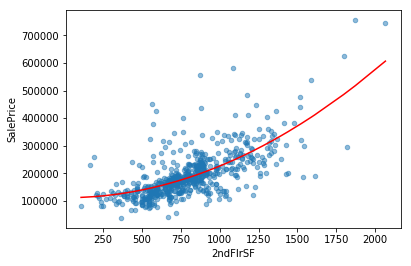

In [8]:
#Polynomial
df_2 = df_2.sort_values(by='2ndFlrSF')
#Feature
df_2['2ndFlrSF **2'] = df_2['2ndFlrSF'] **2
features = ['2ndFlrSF', '2ndFlrSF **2']
X = df_2[features]

#Apply nat log to y, target
y= df_2['SalePrice']

#Fit to model
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

#R^2
print('R^2:', r2_score(y,y_pred))
#Does the same: print(model.score(X,y))

ax = df_2.plot(x='2ndFlrSF', y='SalePrice', kind='scatter', alpha=0.5)
ax.plot(X['2ndFlrSF'], y_pred, color='r')

RMSE: 45032.69069407139
R^2: 0.6784507354727529


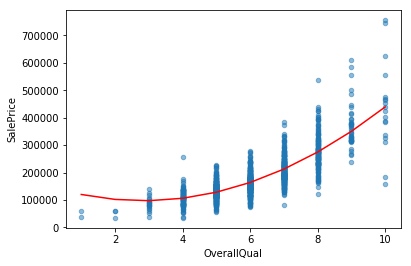

In [9]:
#Polynomial
df = df.sort_values(by='OverallQual')
#Feature
df['OverallQual **2'] = df['OverallQual'] **2
features = ['OverallQual', 'OverallQual **2']
X = df[features]

#Apply nat log to y, target
y= df['SalePrice']

#Fit to model
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y, y_pred)))

#R^2
print('R^2:', r2_score(y,y_pred))
#Does the same: print(model.score(X,y))

ax = df.plot(x='OverallQual', y='SalePrice', kind='scatter', alpha=0.5)
ax.plot(X['OverallQual'], y_pred, color='r')

In [10]:
#Interaction Feature
df['GarageArea x GarageCars'] = df['GarageArea'] * df['GarageCars']

feature = ['GarageArea','GarageCars','GarageArea x GarageCars']
target = 'SalePrice'

X = df[feature]
y = df[target]

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

#Root mean squared error RMSE
print('RMSE:', np.sqrt(mean_squared_error(y,y_pred)))

#R^2
print('R^2:', r2_score(y,y_pred))
#Does the same: print(model.score(X,y))

RMSE: 57860.44698244868
R^2: 0.4691701997454326


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data